In [1]:
%pylab inline
from datetime import date
from app import create_app
from app.instrument import Instrument
from app.analysis import Quote
with create_app().app_context():
    quote = Quote([b.symbol for b in Instrument.find_reits()], 120)
f'from {quote.start.date()} to {date.today()}'

Populating the interactive namespace from numpy and matplotlib


'from 2019-02-11 to 2019-06-11'

In [2]:
stat = quote.statistics(21)
stat = stat[(stat['drawdown'] < 5) & (stat['21-mean'] > 1)]
stat

,21-len,21-mean,21-std,21-shrp,drawdown
Symbols,,,,,
BXMT,63,2.245570,1.224939,1.691366,3.151201
INVH,63,3.692646,2.262609,1.555238,3.809150
EQIX,63,5.297732,3.397139,1.508323,4.324717
WPC,63,3.804465,2.790286,1.301198,4.296338
BRG,63,3.274351,2.414626,1.284092,4.035088
AMT,63,5.027682,4.315909,1.124661,4.096787
EPR,63,2.438065,2.513310,0.900929,4.396561
GLPI,63,3.084881,3.610909,0.806204,4.783679
ARI,63,1.715437,2.029544,0.759622,3.719230


In [3]:
quote.setup_mask(stat.index)
quote.least_correlated_portfolio(21, 2)

['BXMT', 'INVH'] -2.0416796290821697 -0.1871455440305524 1.3920701463319425 -3.24660423138356


['BXMT', 'INVH']

In [4]:
quote.setup_mask(stat.index)
quote.least_correlated_portfolio(21, 2, ['VNQ'])

['VNQ', 'BXMT'] -0.8116234574976324 0.12950851605329916 1.42524299658722 -2.3663749701381516


['VNQ', 'BXMT']

In [5]:
quote.setup_mask(['BXMT', 'VNQ'])
quote.find_optimal_ratio(21, 2)

     fun: 1.2029601382716308
     jac: array([2.40351729, 2.41307718])
 message: 'Optimization terminated successfully.'
    nfev: 8
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([0.74863481, 0.25136519])


/Users/chaoyi/.local/share/virtualenvs/portfolio_analysis-bdMx2S3t/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


({'BXMT': 0.7486348050222835, 'VNQ': 0.25136519497771653}, 2.0586, 1.0968)

,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
Portfolio,63.0,2.053256,1.096548,-0.639755,1.320421,2.184993,2.742173,4.196689,1.714021,2.342020
BXMT,63.0,2.245570,1.224939,-0.871525,1.590127,2.421245,3.235643,4.384921,1.691366,3.151201
VNQ,63.0,1.501723,1.967340,-2.311019,0.065053,1.293051,3.053851,5.608280,0.675009,3.975014


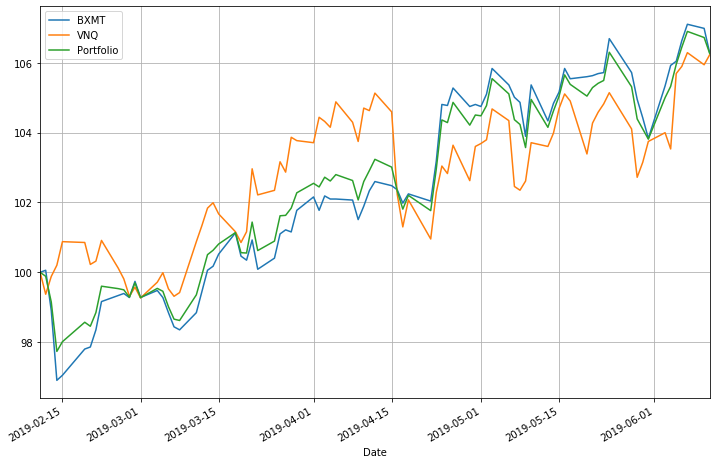

In [6]:
quote.graph(21, {'BXMT': 0.7486348050222835, 'VNQ': 0.25136519497771653})